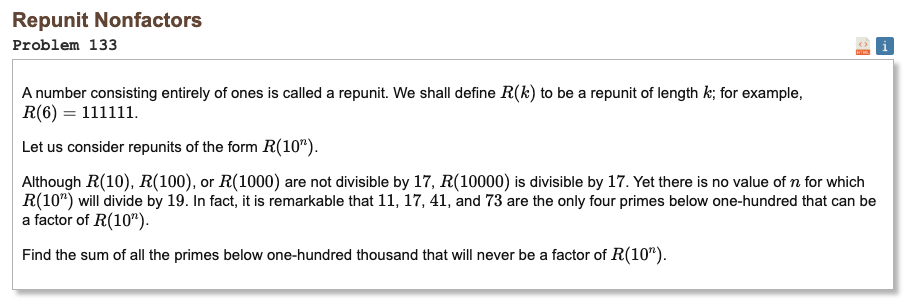

## Initial approach

* two main questions here; where to start and where to stop.
* make a sieve to list all primes below 100000
* for each prime p not equal to 2 or 5 decide if it can divide some r(10^n)
* use the multiplicative order t = ord_p(10) which must divide p−1
* find t by factoring p−1 and shrinking t while pow(10, t/q, p) equals 1
* treat p = 3 as never a factor since r(k) ≡ k mod 3 and 10^n ≡ 1 mod 3
* if all prime factors of t are only 2 or 5 then p can divide some r(10^n)
* otherwise p will never divide any r(10^n)
* sum all primes that will never divide r(10^n) and print the result

In [1]:
import math

def sieve(n):
    b = bytearray(b"\x01") * (n + 1)
    b[0:2] = b"\x00\x00"
    for i in range(2, int(n**0.5) + 1):
        if b[i]:
            b[i*i:n+1:i] = b"\x00" * (((n - i*i) // i) + 1)
    return [i for i, v in enumerate(b) if v]

def prime_factors(n, primes):
    res = []
    x = n
    for q in primes:
        if q * q > x:
            break
        if x % q == 0:
            res.append(q)
            while x % q == 0:
                x //= q
    if x > 1:
        res.append(x)
    return res

def order10_mod_p(p, primes):
    d = p - 1
    facs = prime_factors(d, primes)
    for q in facs:
        while d % q == 0 and pow(10, d // q, p) == 1:
            d //= q
    return d

def sum_nonfactors(limit):
    primes = sieve(limit - 1)
    total = 0
    for p in primes:
        if p in (2, 5, 3):
            total += p
            continue
        ord10 = order10_mod_p(p, primes)
        t = ord10
        while t % 2 == 0:
            t //= 2
        while t % 5 == 0:
            t //= 5
        if t != 1:
            total += p
    return total

print("Result:", sum_nonfactors(100000))

Result: 453647705
